In [1]:
import numpy as np
import scipy.io as sio
import glob
from sklearn import linear_model
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import math
from itertools import cycle
from scipy.optimize import curve_fit
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from scipy.stats import sem
from scipy import stats
from scipy import ndimage
import pystan
from matplotlib import cm
import pyprind
%matplotlib inline
import itertools
from sklearn.cross_decomposition import PLSRegression

color_cycle = cycle(['g', 'b', 'c', 'm', 'y', 'k'])

import warnings
warnings.simplefilter("ignore")


import matplotlib as mpl
mpl.rcParams['font.size'] = 16
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 'large'

%matplotlib inline
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

color_cycle = cycle(['g', 'b', 'c', 'm', 'y', 'k'])


import sys
sys.path.append('C:\\Users\\adamimos\\Documents\\GitHub\\ASAC\\python')
from import_rat_data import *
from behavior_analysis import *
#from decoder_functions import *

def simpleaxis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import cv2
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.model_selection import cross_validate

In [311]:
file = open("C:\\Users\\adamimos\\Documents\\DATA\\Complete_data_files\\RSKTask\\.pickle",'rb')
data = pickle.load(file)
file.close()   

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\adamimos\\Documents\\DATA\\Complete_data_files\\RSKTask\\adam0_20181015.pickle'

In [96]:
file = open("C:\\Users\\adamimos\\Documents\\DATA\\Complete_data_files\\Gratings45ContrastTask\\Adam0_20190515.pickle",'rb')
file = open("C:\\Users\\adamimos\\Documents\\DATA\\Complete_data_files\\GratingsLRcontrastTask\\Adam0_20190303.pickle",'rb')

#file = open("C:\\Users\\adamimos\\Documents\\DATA\\Complete_data_files\\MotionPulses45\\adam0_20190812b.pickle",'rb')
data = pickle.load(file)
file.close()   

In [153]:
file = open("C:\\Users\\adamimos\\Documents\\DATA\\Complete_data_files\\OriCloudsTask\\Adam0_20190429.pickle",'rb')
data = pickle.load(file)
file.close()   

In [157]:
file = open("C:\\Users\\adamimos\\Documents\\DATA\\Complete_data_files\\OriCloudsTask\\Adam0_20190428.pickle",'rb')
data = pickle.load(file)
file.close()   

In [139]:
file = open("C:\\Users\\adamimos\\Documents\\DATA\\Complete_data_files\\RDKPriorsTask\\Terry20190212.pickle",'rb')
#file = open("C:\\Users\\adamimos\\Documents\\DATA\\Complete_data_files\\RDKPriorsTask\\adam0_20181015.pickle",'rb')
#file = open("C:\\Users\\adamimos\\Documents\\DATA\\Complete_data_files\\RDKPriorsTask\\centerhold_20190801.pickle",'rb')

data = pickle.load(file)
file.close()   

In [142]:
file = open("C:\\Users\\adamimos\\Documents\\DATA\\Complete_data_files\\MotionPulses\\adam0_20190729.pickle",'rb')
data = pickle.load(file)
file.close()   

In [259]:
file = open("C:\\Users\\adamimos\\Documents\\DATA\\Complete_data_files\\RetinotopiCmapping\\Adam0_20190625.pickle",'rb')
data = pickle.load(file)
file.close()   

In [81]:
file = open("C:\\Users\\adamimos\\Documents\\DATA\\Complete_data_files\\GratingTaskRotate\\Adam0_20190516.pickle",'rb')
data = pickle.load(file)
file.close()   

In [2]:
file = open("C:\\Users\\adamimos\\Documents\\DATA\\Complete_data_files\\MotionPulses45\\centerhold_20190808.pickle",'rb')
file = open("C:\\Users\\adamimos\\Documents\\DATA\\Complete_data_files\\MotionPulses45\\adam0_20190823.pickle",'rb')

data = pickle.load(file)
file.close()   

In [60]:
np.isnan(data['all_data']['traces']).sum()

0

In [61]:
np.isnan(data['completed_trials_data']['traces_stim_aligned']).sum()

0

In [6]:
def decode_one_per_timepoint(traces,to_decode,n_repeats=40):

    data_over_time = []

    bar = pyprind.ProgBar(traces.shape[2], track_time=True)

    for t in range(traces.shape[2]):

        data_ = []
        for repeat in range(n_repeats):

            # DEFINE DATASET
            X = traces[:,:,t] # features
            y = to_decode # category

            # UNDERSAMPLE DATA TO CREATE BALANCED DATASET
            rus = RandomUnderSampler()
            X_resampled, y_resampled = rus.fit_resample(X, y)
            #rus_indices = rus.sample_indices_
            #print(sorted(Counter(y_resampled).items())) # check number of each category

            # DO 10-FOLD CROSS VALIDATION
            model = linear_model.LogisticRegression(C=1000000)
            cv_results = cross_validate(model, X_resampled, y_resampled, cv=10)
            data_.append(np.mean(cv_results['test_score']))

        data_over_time.append(np.mean(data_))
        bar.update()
    
    print(sorted(Counter(y_resampled).items())) # check number of each category    
    return data_over_time

In [7]:
def make_one_per_timepoint_decoders(data):
    
    fig = plt.figure(figsize=(20,10))
    print('DECODER FOR CORRECT TRIALS')
    data_to_decode_inds = np.where(data['completed_trials_data']['was_correct'])[0]
    to_decode = data['completed_trials_data']['response_side'][data_to_decode_inds]
    traces = data['completed_trials_data']['traces_stim_aligned'][data_to_decode_inds,:,:]
    correct_trial_decoder = decode_one_per_timepoint(traces,to_decode)
    plt.plot(correct_trial_decoder,label='correct trials only')
    print("")
    
    print('DECODER FOR RESPONSE DIR GIVEN STIM LEFT')
    un = np.unique(data['completed_trials_data']['correct_side'])
    data_to_decode_inds = np.where(data['completed_trials_data']['correct_side']==un[1])[0]
    to_decode = data['completed_trials_data']['response_side'][data_to_decode_inds]
    traces = data['completed_trials_data']['traces_stim_aligned'][data_to_decode_inds,:,:]
    resp_decoder_stim_left = decode_one_per_timepoint(traces,to_decode)
    plt.plot(resp_decoder_stim_left,label='resp given stim left')
    print("")
    
    print('DECODER FOR RESPONSE DIR GIVEN STIM RIGHT')
    un = np.unique(data['completed_trials_data']['correct_side'])
    data_to_decode_inds = np.where(data['completed_trials_data']['correct_side']==un[0])[0]
    to_decode = data['completed_trials_data']['response_side'][data_to_decode_inds]
    traces = data['completed_trials_data']['traces_stim_aligned'][data_to_decode_inds,:,:]
    resp_decoder_stim_right = decode_one_per_timepoint(traces,to_decode)
    plt.plot(resp_decoder_stim_right,label='resp given stim right')
    print("")
    
    print('DECODER FOR STIM DIR GIVEN RESPONSE LEFT')
    un = np.unique(data['completed_trials_data']['response_side'])
    data_to_decode_inds = np.where(data['completed_trials_data']['response_side']==un[1])[0]
    to_decode = data['completed_trials_data']['correct_side'][data_to_decode_inds]
    traces = data['completed_trials_data']['traces_stim_aligned'][data_to_decode_inds,:,:]
    stim_decoder_resp_left = decode_one_per_timepoint(traces,to_decode)
    plt.plot(stim_decoder_resp_left,label='stim given resp left')
    print("")
    
    print('DECODER FOR STIM DIR GIVEN RESPONSE RIGHT')
    un = np.unique(data['completed_trials_data']['response_side'])
    data_to_decode_inds = np.where(data['completed_trials_data']['response_side']==un[0])[0]
    to_decode = data['completed_trials_data']['correct_side'][data_to_decode_inds]
    traces = data['completed_trials_data']['traces_stim_aligned'][data_to_decode_inds,:,:]
    stim_decoder_resp_right = decode_one_per_timepoint(traces,to_decode)
    plt.plot(stim_decoder_resp_right,label='stim given resp right')
    print("")
    
    plt.legend()
    

In [8]:
make_one_per_timepoint_decoders(data)

DECODER FOR CORRECT TRIALS


KeyboardInterrupt: 

<Figure size 1440x720 with 0 Axes>

# Decode correct trials, one decoder per timepoint

In [12]:
def decode_each_timepoint_a_sample(traces,to_decode,n_repeats = 10,time_inds = np.arange(40,60)):
    repeat_data = []
    bar = pyprind.ProgBar(n_repeats, track_time=True)

    for r in range(n_repeats):
        # subsample data
        X = traces[:,:,0]
        y = to_decode
        rus = RandomUnderSampler()
        X_resampled, y_resampled = rus.fit_resample(X, y)
        rus_indices = rus.sample_indices_

        # split data into ten pieces
        np.random.shuffle(rus_indices)
        split_inds = np.array_split(rus_indices,10)


        acc_per_split = []
        for i in range(len(split_inds)):
            testing_inds = split_inds[i]
            training_inds = np.setdiff1d(rus_indices, testing_inds)

            X = traces[:,:,time_inds]
            X = X[training_inds,:,:]
            X = X.transpose(0,2,1)
            X = np.reshape(X,(X.shape[0]*X.shape[1],X.shape[2]))
            y = to_decode[training_inds] # category
            y = np.repeat(y,len(time_inds))
            model = linear_model.LogisticRegression(C=100)
            model.fit(X,y)


            # Get accuracy at every point in time of the testing data
            acc_ = [] # holds accuracy at every ppint in time for a given split
            for t in range(traces.shape[2]):
                predictions = model.predict(traces[testing_inds,:,t])
                y_ = to_decode[testing_inds]
                acc_.append(np.mean(predictions == y_))
            acc_per_split.append(acc_)    

        repeat_data.append(np.mean(acc_per_split,axis=0))
        bar.update()
    return np.mean(repeat_data,axis=0)
    



In [13]:
def make_decoder_over_all_timepoints(data):
    
    fig = plt.figure(figsize=(20,10))
    print('DECODER FOR CORRECT TRIALS')
    data_to_decode_inds = np.where(data['completed_trials_data']['was_correct'])[0]
    to_decode = data['completed_trials_data']['response_side'][data_to_decode_inds]
    traces = data['completed_trials_data']['traces_stim_aligned'][data_to_decode_inds,:,:]
    correct_trial_decoder = decode_each_timepoint_a_sample(traces,to_decode)
    plt.plot(correct_trial_decoder,label='correct trials only')
    print("")
    
    print('DECODER FOR RESPONSE DIR GIVEN STIM LEFT')
    un = np.unique(data['completed_trials_data']['correct_side'])
    data_to_decode_inds = np.where(data['completed_trials_data']['correct_side']==un[1])[0]
    to_decode = data['completed_trials_data']['response_side'][data_to_decode_inds]
    traces = data['completed_trials_data']['traces_stim_aligned'][data_to_decode_inds,:,:]
    resp_decoder_stim_left = decode_each_timepoint_a_sample(traces,to_decode)
    plt.plot(resp_decoder_stim_left,label='resp given stim left')
    print("")
    
    print('DECODER FOR RESPONSE DIR GIVEN STIM RIGHT')
    un = np.unique(data['completed_trials_data']['correct_side'])
    data_to_decode_inds = np.where(data['completed_trials_data']['correct_side']==un[0])[0]
    to_decode = data['completed_trials_data']['response_side'][data_to_decode_inds]
    traces = data['completed_trials_data']['traces_stim_aligned'][data_to_decode_inds,:,:]
    resp_decoder_stim_right = decode_each_timepoint_a_sample(traces,to_decode)
    plt.plot(resp_decoder_stim_right,label='resp given stim right')
    print("")
    
    print('DECODER FOR STIM DIR GIVEN RESPONSE LEFT')
    un = np.unique(data['completed_trials_data']['response_side'])
    data_to_decode_inds = np.where(data['completed_trials_data']['response_side']==un[1])[0]
    to_decode = data['completed_trials_data']['correct_side'][data_to_decode_inds]
    traces = data['completed_trials_data']['traces_stim_aligned'][data_to_decode_inds,:,:]
    stim_decoder_resp_left = decode_each_timepoint_a_sample(traces,to_decode)
    plt.plot(stim_decoder_resp_left,label='stim given resp left')
    print("")
    
    print('DECODER FOR STIM DIR GIVEN RESPONSE RIGHT')
    un = np.unique(data['completed_trials_data']['response_side'])
    data_to_decode_inds = np.where(data['completed_trials_data']['response_side']==un[0])[0]
    to_decode = data['completed_trials_data']['correct_side'][data_to_decode_inds]
    traces = data['completed_trials_data']['traces_stim_aligned'][data_to_decode_inds,:,:]
    stim_decoder_resp_right = decode_each_timepoint_a_sample(traces,to_decode)
    plt.plot(stim_decoder_resp_right,label='stim given resp right')
    print("")
    
    plt.legend()

DECODER FOR CORRECT TRIALS


0% [##########] 100% | ETA: 00:00:00


DECODER FOR RESPONSE DIR GIVEN STIM LEFT



Total time elapsed: 00:00:15
0% [##########] 100% | ETA: 00:00:00


DECODER FOR RESPONSE DIR GIVEN STIM RIGHT



Total time elapsed: 00:00:06
0% [##########] 100% | ETA: 00:00:00


DECODER FOR STIM DIR GIVEN RESPONSE LEFT



Total time elapsed: 00:00:06
0% [##########] 100% | ETA: 00:00:00


DECODER FOR STIM DIR GIVEN RESPONSE RIGHT



Total time elapsed: 00:00:06
0% [##########] 100% | ETA: 00:00:00
Total time elapsed: 00:00:06


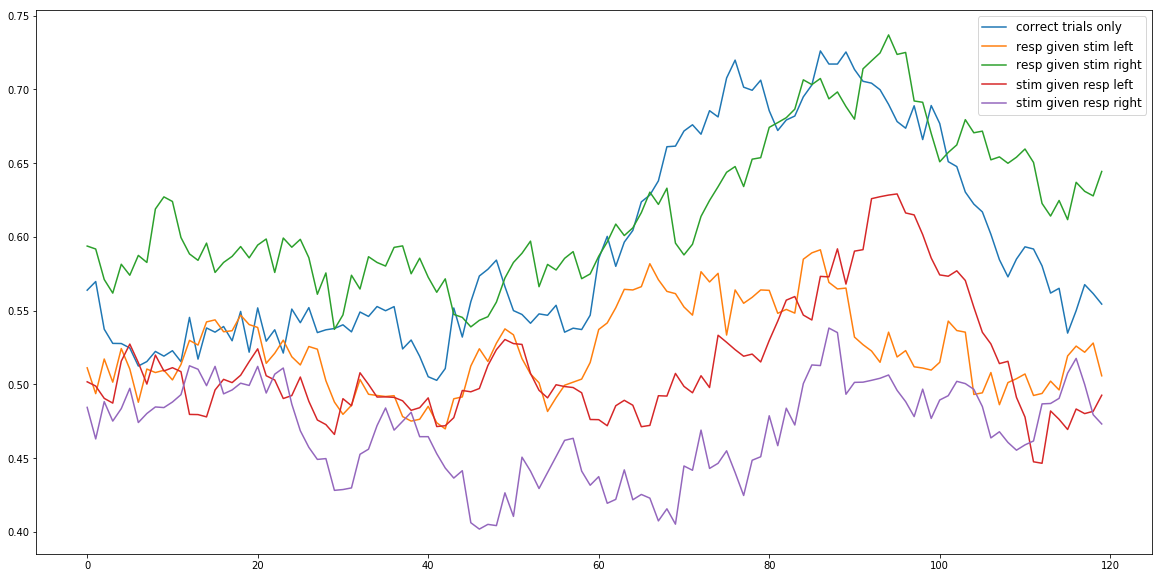

In [14]:

make_decoder_over_all_timepoints(data)

In [ ]:
# Make Subsampled Dataset 

In [227]:
data['completed_trials_data'].keys()

dict_keys(['was_completed', 'was_correct', 'correct_side', 'prior', 'noise', 'response_side', 'traces_stim_aligned', 'traces_resp_aligned', 'completed_inds', 'frame_info'])

In [281]:
independent_variable = noise
data_to_avg = data['completed_trials_data']['traces_stim_aligned']
av_traces = []
for x in np.unique(independent_variable):
    av_traces.append(np.mean(data_to_avg[np.where(independent_variable==x)[0],:,:],axis=0))
av_traces = np.array(av_traces)


In [288]:
import matplotlib.pylab as pl

def plot_av_dir_traces(n):
    #fig = plt.figure(figsize=(20,7))
    colors = pl.cm.RdBu(np.linspace(0,1,data_to_avg.shape[0]))
    #plt.subplot(1,2,1)
    for x in range(av_traces.shape[0]):
        plt.plot(np.squeeze(av_traces[x,n,:]),color = colors[x])  
    plt.plot([35,35],[0,np.max(np.ravel(av_traces[:,n,:]))],'--k')
    plt.plot([40,40],[0,np.max(np.ravel(av_traces[:,n,:]))],'--k')
    plt.plot([47,47],[0,np.max(np.ravel(av_traces[:,n,:]))],'--k')
    plt.xticks([35,43], ['poke','stim'])
    plt.xlim([20,60])

In [289]:
interact(plot_av_dir_traces,n=widgets.IntSlider(min=0,max=data_to_avg.shape[1]-1,step=1,value=1))

interactive(children=(IntSlider(value=1, description='n', max=254), Output()), _dom_classes=('widget-interact'…

<function __main__.plot_av_dir_traces(n)>

In [284]:
def plot_rasters(n):
    #fig = plt.figure(figsize=(20,7))
    #plt.subplot(1,2,1)
    plt.imshow(data_to_avg[np.argsort(independent_variable),n,:],aspect='auto')
    
    #plt.subplot(1,2,2)
    #plt.imshow(traces_resp_aligned[np.argsort(directions),n,:],aspect='auto')

In [285]:
interact(plot_rasters,n=widgets.IntSlider(min=0,max=av_traces.shape[1],step=1,value=10))

interactive(children=(IntSlider(value=10, description='n', max=255), Output()), _dom_classes=('widget-interact…

<function __main__.plot_rasters(n)>

In [277]:
stim_right = data['completed_trials_data']['correct_side']=='right'

In [279]:
noise = data['completed_trials_data']['noise']
noise[np.where(stim_right)] = -noise

In [280]:
noise

array([ 0.5 , -0.5 ,  0.5 , -0.75,  1.  ,  1.  ,  1.  ,  1.  ,  0.75,
        0.5 ,  0.5 ,  1.  ,  0.75, -0.5 , -0.5 , -1.  ,  0.75, -1.  ,
        0.75, -1.  , -1.  ,  0.25,  0.5 ,  0.75,  0.75,  0.5 ,  0.75,
       -0.75, -0.5 ,  1.  ,  0.5 ,  0.75, -0.5 ,  1.  , -1.  ,  0.5 ,
        0.75,  1.  ,  1.  ,  1.  ,  0.5 ,  0.5 , -0.75,  0.75, -0.25,
        0.25, -1.  ,  0.5 ,  0.25, -0.75,  1.  , -0.75,  0.5 , -0.25,
       -0.75,  0.5 , -0.5 ,  0.75, -0.5 ,  0.25, -0.25, -0.5 ,  0.5 ,
        0.5 ,  1.  ,  0.5 , -0.75,  0.5 ,  0.75,  1.  ,  0.75, -0.75,
       -0.5 , -0.75,  0.75, -0.75, -1.  , -1.  ,  0.5 , -0.5 ,  0.75,
       -0.75,  0.5 , -0.75, -1.  , -0.75, -0.5 , -0.75, -1.  ,  0.75,
        0.25, -1.  , -1.  , -0.5 , -0.5 ,  0.75, -0.75, -0.75, -1.  ,
        0.5 , -0.25, -0.5 , -0.5 , -0.25,  0.5 , -0.25, -1.  , -1.  ,
       -0.5 , -0.75,  0.75,  1.  , -1.  , -0.5 ,  0.5 , -0.5 , -0.75,
       -1.  , -0.25, -0.75, -0.75, -0.5 , -0.5 , -1.  , -0.5 , -0.25,
       -0.5 ,  1.  ,

In [21]:
[[x,y] for x in data['completed_trials_data']['response_side'] and y in data['completed_trials_data']['correct_side']

AttributeError: 'numpy.ufunc' object has no attribute 'inner'

In [214]:

def make_decoder2(data, category_to_decode,time_inds = np.arange(40,60),n_repeats=5):
    repeat_data = []
    bar = pyprind.ProgBar(n_repeats, track_time=True)
    
    traces = np.array(data['completed_trials_data']['traces_stim_aligned'])
    
    # we need to balance our dataset between all the types of stimulii and responses
    resp = np.array(data['completed_trials_data']['response_side'])
    stim = np.array(data['completed_trials_data']['correct_side'])

    # get the labels for the responses and the stimulii
    resp_un = np.unique(resp)
    stim_un = np.unique(stim)

    # make a list of the product of these two vectors
    prod = list(itertools.product(resp_un,stim_un))

    # number them in a dictionary
    prod_dict = dict(zip(prod, range(len(prod))))

    # convert the combos to unique numbers
    unique_types = [prod_dict[resp[i],stim[i]] for i in range(len(resp))]


    
    for r in range(n_repeats):
        rus = RandomUnderSampler()
            # finally, do the undersampling
        X = np.array(data['completed_trials_data']['traces_stim_aligned'])[:,:,0]
        y = unique_types
        X_resampled, y_resampled = rus.fit_resample(X, y)
        rus_indices = rus.sample_indices_
        #print(len(rus_indices))
            
        # split data into ten pieces
        np.random.shuffle(rus_indices)
        split_inds = np.array_split(rus_indices,5)
        acc_per_split = []
        for i in range(len(split_inds)):
            testing_inds = split_inds[i]
            training_inds = np.setdiff1d(rus_indices, testing_inds)
            
            X = traces[:,:,time_inds]
            X = X[training_inds,:,:]
            X = X.transpose(0,2,1)
            X = np.reshape(X,(X.shape[0]*X.shape[1],X.shape[2]))
            y = np.array(data['completed_trials_data'][category_to_decode])[training_inds]
            y = np.repeat(y,len(time_inds))
            model = linear_model.LogisticRegression(penalty='l2',C=1000)
            model.fit(X,y)

            #print(model.score(X,y))

            # Get accuracy at every point in time of the testing data
            acc_ = [] # holds accuracy at every ppint in time for a given split
            for t in range(traces.shape[2]):
                predictions = model.predict(traces[testing_inds,:,t])
                y_ = np.array(data['completed_trials_data'][category_to_decode])[testing_inds]
                acc_.append(np.mean(predictions == y_))
            acc_per_split.append(acc_)    

        repeat_data.append(np.mean(acc_per_split,axis=0))
        bar.update()
    print(len(rus_indices))
    return np.mean(repeat_data,axis=0)    
        

0% [#####] 100% | ETA: 00:00:00

136



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


136


Text(0.5,0,'frame in trial')

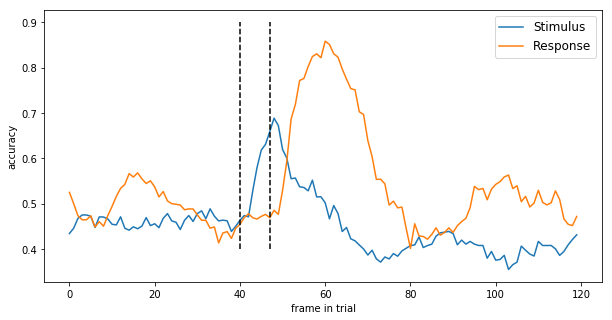

In [209]:
fig = plt.figure(figsize=(10,5))
plt.plot(make_decoder2(data,'correct_side'),label='Stimulus')
plt.plot(make_decoder2(data,'response_side'),label='Response')
plt.plot([40,40],[0.4,0.9],'k--')
plt.plot([47,47],[0.4,0.9],'k--')
plt.legend()
plt.ylabel('accuracy')
plt.xlabel('frame in trial')

In [210]:

def make_decoder3(data, category_to_decode,time_inds = np.arange(40,60),n_repeats=5):
    repeat_data = []
    bar = pyprind.ProgBar(n_repeats, track_time=True)
    
    traces = np.array(data['completed_trials_data']['traces_stim_aligned'])
    
    # we need to balance our dataset between all the types of stimulii and responses
    resp = np.array(data['completed_trials_data']['response_side'])
    stim = np.array(data['completed_trials_data']['correct_side'])

    # get the labels for the responses and the stimulii
    resp_un = np.unique(resp)
    stim_un = np.unique(stim)

    # make a list of the product of these two vectors
    prod = list(itertools.product(resp_un,stim_un))

    # number them in a dictionary
    prod_dict = dict(zip(prod, range(len(prod))))

    # convert the combos to unique numbers
    unique_types = [prod_dict[resp[i],stim[i]] for i in range(len(resp))]


    
    for r in range(n_repeats):
        rus = RandomUnderSampler()
            # finally, do the undersampling
        X = np.array(data['completed_trials_data']['traces_stim_aligned'])[:,:,0]
        y = unique_types
        X_resampled, y_resampled = rus.fit_resample(X, y)
        rus_indices = rus.sample_indices_
        #print(len(rus_indices))
            
        # split data into ten pieces
        np.random.shuffle(rus_indices)
        split_inds = np.array_split(rus_indices,5)
        acc_per_split = []
        for i in range(len(split_inds)):
            testing_inds = split_inds[i]
            training_inds = np.setdiff1d(rus_indices, testing_inds)
            
            X = traces[:,:,time_inds]
            X = X[training_inds,:,:]
            X = X.transpose(0,2,1)
            X = np.reshape(X,(X.shape[0]*X.shape[1],X.shape[2]))
            y = np.array(data['completed_trials_data'][category_to_decode])[training_inds]
            y = np.repeat(y,len(time_inds))
            model = linear_model.LogisticRegression(penalty='l2',C=1000000000000)
            model.fit(X,y)

            #print(model.score(X,y))

            # Get accuracy at every point in time of the testing data
            acc_ = [] # holds accuracy at every ppint in time for a given split
            for t in range(traces.shape[2]):
                predictions = model.predict(traces[testing_inds,:,t])
                y_ = np.array(data['completed_trials_data'][category_to_decode])[testing_inds]
                acc_.append(np.mean(predictions == y_))
            acc_per_split.append(acc_)    

        repeat_data.append(np.mean(acc_per_split,axis=0))
        bar.update()
    print(len(rus_indices))
    return np.mean(repeat_data,axis=0)    
        

0% [#####] 100% | ETA: 00:00:00

136



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00

136



Total time elapsed: 00:00:00


Text(0.5,0,'frame in trial')

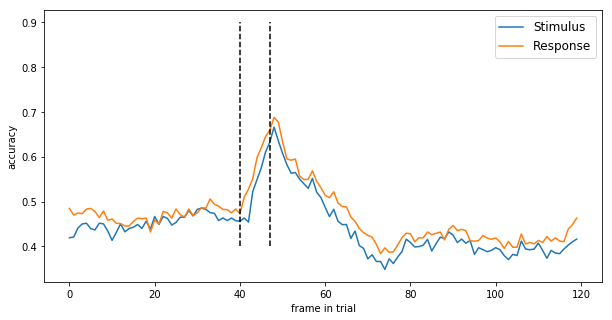

In [211]:
fig = plt.figure(figsize=(10,5))
plt.plot(make_decoder2(data,'correct_side'),label='Stimulus')
plt.plot(make_decoder2(data,'correct_side'),label='Response')
plt.plot([40,40],[0.4,0.9],'k--')
plt.plot([47,47],[0.4,0.9],'k--')
plt.legend()
plt.ylabel('accuracy')
plt.xlabel('frame in trial')

In [212]:
def sub_data(data,percent=1):
    n_trials = np.arange(len(data['completed_trials_data']['was_completed']))
    np.random.shuffle(n_trials)
    trial_i = n_trials[0:int(len(n_trials)*percent)]
    data2={}
    data2['completed_trials_data']={}
    for i in data['completed_trials_data'].keys():
        if i!= 'frame_info':
            try:
                data2['completed_trials_data'][i]=data['completed_trials_data'][i][trial_i]
            except:
                data2['completed_trials_data'][i]=data['completed_trials_data'][i][trial_i,:,:]
    return data2

100


0% [#####] 100% | ETA: 00:00:00

136



Total time elapsed: 00:00:01
0% [#####] 100% | ETA: 00:00:00

136



Total time elapsed: 00:00:01
0% [#####] 100% | ETA: 00:00:00

136



Total time elapsed: 00:00:01
0% [#####] 100% | ETA: 00:00:00

136



Total time elapsed: 00:00:01
0% [#####] 100% | ETA: 00:00:00

136
75



Total time elapsed: 00:00:01
0% [#####] 100% | ETA: 00:00:00

104



Total time elapsed: 00:00:01
0% [#####] 100% | ETA: 00:00:00

100



Total time elapsed: 00:00:01
0% [#####] 100% | ETA: 00:00:00

96



Total time elapsed: 00:00:01
0% [#####] 100% | ETA: 00:00:00

96



Total time elapsed: 00:00:01
0% [#####] 100% | ETA: 00:00:00

104



Total time elapsed: 00:00:01
0% [#####] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


56


0% [#####] 100% | ETA: 00:00:00

60



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00

48



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


76


0% [#####] 100% | ETA: 00:00:00

68



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00

56



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00

72



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00

52



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00

64



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


64
40


0% [#####] 100% | ETA: 00:00:00

56



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00

52



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00

52



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00

48



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00

52



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00

56



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00

52



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00

40



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00

40



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00

44
30



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00

32



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00

36



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00

44



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00

32



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00

28



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00

28



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00

32



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00

28



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00

40



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00

40



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00

36



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00

20



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00

40



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00

36



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00

44
15



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00

20



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00

8



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00

20



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00

8



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00

12



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00

12



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00

12



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


8


0% [#####] 100% | ETA: 00:00:00

8



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00

20



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00

16



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00

16



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00

20



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00

16



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00

12



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00

12



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00

16



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00

12



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


8


0% [#####] 100% | ETA: 00:00:00

8



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00

8



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00

8



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00

20



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00

8



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00

16



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00

16



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00

12



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00

12



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00

16



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00

24



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00

12



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00

12



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00

8



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00

8



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00

12



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00

8



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


8


0% [#####] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


8


0% [#####] 100% | ETA: 00:00:00

16



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00

8



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00

12



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00

12



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00

12



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00

8



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00

12



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00

8



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


8


0% [#####] 100% | ETA: 00:00:00

8



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00

12



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00

8



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00

15



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00

8



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00

8



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


12


0% [#####] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


8


0% [#####] 100% | ETA: 00:00:00

12



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00

8



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00

8



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00

8



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00

8



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00

12



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00

12



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


8


0% [#####] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


8


0% [#####] 100% | ETA: 00:00:00

8



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00

8



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00

12



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00

8



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00

8



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00

8



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00

12



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00

8



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00

12



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00

12



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00

8



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00

12



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00

12



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00

16



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00

8



Total time elapsed: 00:00:00
0% [#####] 100% | ETA: 00:00:00

12



Total time elapsed: 00:00:00


(20, 60)

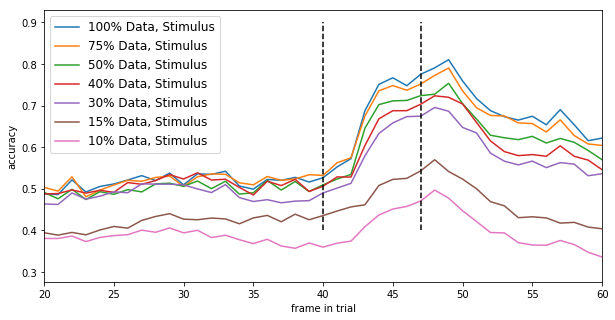

In [215]:
def sub_decoder(p=1):
    acc = []
    repeat = 5*int(1/p)
    for i in range(repeat):
        do_over = 1
        while do_over==1:
            try:
                acc.append(make_decoder2(sub_data(data,p),'correct_side'))
                do_over=0
            except:
                do_over = 1
    np.array(acc)
    return np.mean(acc,axis=0)
    


fig = plt.figure(figsize=(10,5))

print(100)
plt.plot(sub_decoder(1),label='100% Data, Stimulus')
print(75)
plt.plot(sub_decoder(0.75),label='75% Data, Stimulus')
plt.plot(sub_decoder(0.5),label='50% Data, Stimulus')
print(40)
plt.plot(sub_decoder(0.4),label='40% Data, Stimulus')
print(30)
plt.plot(sub_decoder(0.3),label='30% Data, Stimulus')
print(15)
plt.plot(sub_decoder(0.15),label='15% Data, Stimulus')
plt.plot(sub_decoder(0.1),label='10% Data, Stimulus')

plt.plot([40,40],[0.4,0.9],'k--')
plt.plot([47,47],[0.4,0.9],'k--')
plt.legend()
plt.ylabel('accuracy')
plt.xlabel('frame in trial')
plt.xlim([20,60])

In [202]:
sub_decoder(1)

0% [#####] 100% | ETA: 00:00:00

136



Total time elapsed: 00:00:01
0% [#####] 100% | ETA: 00:00:00

136



Total time elapsed: 00:00:01
0% [#####] 100% | ETA: 00:00:00

136



Total time elapsed: 00:00:01
0% [#####] 100% | ETA: 00:00:00

136



Total time elapsed: 00:00:01
0% [#####] 100% | ETA: 00:00:00

136



Total time elapsed: 00:00:01


array([ 0.51407407,  0.51092063,  0.50009524,  0.4982963 ,  0.52965079,
        0.52680423,  0.51051852,  0.5273545 ,  0.52207407,  0.49713228,
        0.48037037,  0.48124868,  0.52456085,  0.45764021,  0.47129101,
        0.48369312,  0.48009524,  0.48756614,  0.4664127 ,  0.46484656,
        0.48194709,  0.48450794,  0.49749206,  0.4824127 ,  0.49141799,
        0.48891005,  0.53027513,  0.50504762,  0.51531217,  0.53348148,
        0.49634921,  0.53645503,  0.53389418,  0.54946032,  0.49182011,
        0.49351323,  0.51637037,  0.50184127,  0.52121693,  0.51907937,
        0.49998942,  0.50024339,  0.54692063,  0.67164021,  0.74009524,
        0.75521693,  0.73926984,  0.75746032,  0.78356614,  0.7945291 ,
        0.73292063,  0.7102328 ,  0.69566138,  0.67774603,  0.66308995,
        0.65928042,  0.65920635,  0.69124868,  0.64057143,  0.59495238,
        0.6064127 ,  0.59458201,  0.62647619,  0.60428571,  0.56087831,
        0.56046561,  0.57422222,  0.5605291 ,  0.5451746 ,  0.55

In [74]:

def make_decoder2_LOO(data, category_to_decode,time_inds = np.arange(40,60),n_repeats=10):
    repeat_data = []
    bar = pyprind.ProgBar(n_repeats, track_time=True)
    
    traces = data['completed_trials_data']['traces_stim_aligned']
    
    # we need to balance our dataset between all the types of stimulii and responses
    resp = data['completed_trials_data']['response_side']
    stim = data['completed_trials_data']['correct_side']

    # get the labels for the responses and the stimulii
    resp_un = np.unique(resp)
    stim_un = np.unique(stim)

    # make a list of the product of these two vectors
    prod = list(itertools.product(resp_un,stim_un))

    # number them in a dictionary
    prod_dict = dict(zip(prod, range(len(prod))))

    # convert the combos to unique numbers
    unique_types = [prod_dict[resp[i],stim[i]] for i in range(len(resp))]


    
    for r in range(n_repeats):
        rus = RandomUnderSampler()
            # finally, do the undersampling
        X = data['completed_trials_data']['traces_stim_aligned'][:,:,0]
        y = unique_types
        X_resampled, y_resampled = rus.fit_resample(X, y)
        rus_indices = rus.sample_indices_

        acc_per_split = []
        for i in range(len(split_inds)):
            testing_inds = split_inds[i]
            training_inds = np.setdiff1d(rus_indices, testing_inds)
            
            X = traces[:,:,time_inds]
            X = X[training_inds,:,:]
            X = X.transpose(0,2,1)
            X = np.reshape(X,(X.shape[0]*X.shape[1],X.shape[2]))
            y = data['completed_trials_data'][category_to_decode][training_inds]
            y = np.repeat(y,len(time_inds))
            model = linear_model.LogisticRegression(C=.01)
            #np.random.shuffle(y)
            model.fit(X,y)


            # Get accuracy at every point in time of the testing data
            acc_ = [] # holds accuracy at every ppint in time for a given split
            for t in range(traces.shape[2]):
                predictions = model.predict(traces[testing_inds,:,t])
                y_ = data['completed_trials_data'][category_to_decode][testing_inds]
                acc_.append(np.mean(predictions == y_))
            acc_per_split.append(acc_)    

        repeat_data.append(np.mean(acc_per_split,axis=0))
        bar.update()
    return np.mean(repeat_data,axis=0)    
        

In [116]:

def make_PLS_decoder(data, category_to_decode,time_inds = np.arange(40,60),n_repeats=100):
    repeat_data = []
    bar = pyprind.ProgBar(n_repeats, track_time=True)
    
    traces = data['completed_trials_data']['traces_stim_aligned']
    
    # we need to balance our dataset between all the types of stimulii and responses
    resp = data['completed_trials_data']['response_side']
    stim = data['completed_trials_data']['correct_side']

    # get the labels for the responses and the stimulii
    resp_un = np.unique(resp)
    stim_un = np.unique(stim)

    # make a list of the product of these two vectors
    prod = list(itertools.product(resp_un,stim_un))

    # number them in a dictionary
    prod_dict = dict(zip(prod, range(len(prod))))

    # convert the combos to unique numbers
    unique_types = [prod_dict[resp[i],stim[i]] for i in range(len(resp))]


    
    for r in range(n_repeats):
        rus = RandomUnderSampler()
            # finally, do the undersampling
        X = data['completed_trials_data']['traces_stim_aligned'][:,:,0]
        y = unique_types
        X_resampled, y_resampled = rus.fit_resample(X, y)
        rus_indices = rus.sample_indices_
            
        # split data into ten pieces
        np.random.shuffle(rus_indices)
        split_inds = np.array_split(rus_indices,2)
        acc_per_split = []
        for i in range(len(split_inds)):
            testing_inds = split_inds[i]
            training_inds = np.setdiff1d(rus_indices, testing_inds)
            
            X = traces[:,:,time_inds]
            X = X[training_inds,:,:]
            X = X.transpose(0,2,1)
            X = np.reshape(X,(X.shape[0]*X.shape[1],X.shape[2]))
            y = data['completed_trials_data'][category_to_decode][training_inds]
            y = np.repeat(y,len(time_inds))
            
            pls = PLSRegression(n_components =1)
            
            X_p = traces[:,:,time_inds]
            X_p = X_p[testing_inds,:,:]
            X_p = X_p.transpose(0,2,1)
            X_p = np.reshape(X_p,(X_p.shape[0]*X_p.shape[1],X_p.shape[2]))
            y_p = data['completed_trials_data'][category_to_decode][testing_inds]
            y_p = np.repeat(y_p,len(time_inds))
            
            y_p = (y_p=='left')

            
            
            
            pls.fit(X_p,y_p)
            X = np.dot(X,pls.x_weights_)
            
            model = linear_model.LogisticRegression(penalty='l2',C=10000000000000000000)
            y2 = (y=='left')
            model.fit(X,y2)
            
            #print(model.score(X,y))

            # Get accuracy at every point in time of the testing data
            acc_ = [] # holds accuracy at every ppint in time for a given split
            for t in range(traces.shape[2]):
                X_ = np.dot(traces[testing_inds,:,t],pls.x_weights_)
                
                predictions = model.predict(X_)
                y_ = data['completed_trials_data'][category_to_decode][testing_inds]
                y_= (y_=='left')
                acc_.append(np.mean(predictions == y_))
            acc_per_split.append(acc_)    

        repeat_data.append(np.mean(acc_per_split,axis=0))
        bar.update()
    return np.mean(repeat_data,axis=0)    
        

0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:11
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:11


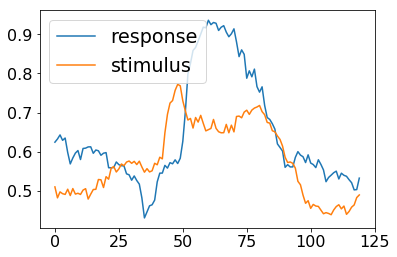

In [117]:
plt.plot(make_PLS_decoder(data, 'response_side',time_inds = np.arange(40,80)),label='response')
plt.plot(make_PLS_decoder(data, 'correct_side',time_inds = np.arange(40,80)),label='stimulus')
plt.legend()

In [27]:
data = loadmat('H:\\Adam0_20190228\\all_data.mat')['data']

In [28]:
pickle.dump( data, open( "adam0_20190228.pickle", "wb" ) )

In [19]:
import scipy
import numpy as np
import scipy.io as spio


def loadmat(filename):
    '''
    this function should be called instead of direct spio.loadmat
    as it cures the problem of not properly recovering python dictionaries
    from mat files. It calls the function check keys to cure all entries
    which are still mat-objects
    '''
    def _check_keys(d):
        '''
        checks if entries in dictionary are mat-objects. If yes
        todict is called to change them to nested dictionaries
        '''
        for key in d:
            if isinstance(d[key], spio.matlab.mio5_params.mat_struct):
                d[key] = _todict(d[key])
        return d

    def _todict(matobj):
        '''
        A recursive function which constructs from matobjects nested dictionaries
        '''
        d = {}
        for strg in matobj._fieldnames:
            elem = matobj.__dict__[strg]
            if isinstance(elem, spio.matlab.mio5_params.mat_struct):
                d[strg] = _todict(elem)
            elif isinstance(elem, np.ndarray):
                d[strg] = _tolist(elem)
            else:
                d[strg] = elem
        return d

    def _tolist(ndarray):
        '''
        A recursive function which constructs lists from cellarrays
        (which are loaded as numpy ndarrays), recursing into the elements
        if they contain matobjects.
        '''
        elem_list = []
        for sub_elem in ndarray:
            if isinstance(sub_elem, spio.matlab.mio5_params.mat_struct):
                elem_list.append(_todict(sub_elem))
            elif isinstance(sub_elem, np.ndarray):
                elem_list.append(_tolist(sub_elem))
            else:
                elem_list.append(sub_elem)
        return elem_list
    data = scipy.io.loadmat(filename, struct_as_record=False, squeeze_me=True)
    return _check_keys(data)